<a href="https://colab.research.google.com/github/shahabday/NLP_learning/blob/main/Copy_of_03_gensim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Gensim to create word embeddings.

## Dr. Tristan Behrens.

In this notebook we will use Gensim to create word embeddings from a corpus.

Word embedding are just fantastic. In a nutshell, they map words to vectors. And with vectors, as we all know, you can do math.

- [Wikipedia: Word Embedding](https://en.wikipedia.org/wiki/Word_embedding).

---

Firstly, we download the corpus. We download the entire Harry Potter collection. Feel free, to use your own corpus.

In [1]:
#!wget -nc "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%201%20-%20The%20Philosopher's%20Stone.txt"
#!wget -nc "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%202%20-%20The%20Chamber%20of%20Secrets.txt"
#!wget -nc "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%203%20-%20The%20Prisoner%20of%20Azkaban.txt"
#!wget -nc "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%204%20-%20The%20Goblet%20of%20Fire.txt"
#!wget -nc "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%205%20-%20The%20Order%20of%20the%20Phoenix.txt"
#!wget -nc "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%206%20-%20The%20Half%20Blood%20Prince.txt"
#!wget -nc "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%207%20-%20The%20Deathly%20Hallows.txt"

!wget -nc "https://raw.githubusercontent.com/bobdeng/owlreader/master/ERead/assets/books/Harry%20Potter%20and%20The%20Half-Blood%20Prince.txt"
!wget -nc "https://raw.githubusercontent.com/bobdeng/owlreader/master/ERead/assets/books/Harry%20Potter%20and%20the%20Chamber%20of%20Secrets.txt"
!wget -nc "https://raw.githubusercontent.com/bobdeng/owlreader/master/ERead/assets/books/Harry%20Potter%20and%20the%20Deathly%20Hallows%20.txt"
!wget -nc "https://raw.githubusercontent.com/bobdeng/owlreader/master/ERead/assets/books/Harry%20Potter%20and%20the%20Goblet%20of%20Fire.txt"
!wget -nc "https://raw.githubusercontent.com/bobdeng/owlreader/master/ERead/assets/books/Harry%20Potter%20and%20the%20Order%20of%20the%20Phoenix.txt"
!wget -nc "https://raw.githubusercontent.com/bobdeng/owlreader/master/ERead/assets/books/Harry%20Potter%20and%20the%20Prisoner%20of%20Azkaban%20.txt"
!wget -nc "https://raw.githubusercontent.com/bobdeng/owlreader/master/ERead/assets/books/Harry%20Potter%20and%20the%20Sorcerer's%20Stone.txt"

--2025-02-12 15:40:56--  https://raw.githubusercontent.com/bobdeng/owlreader/master/ERead/assets/books/Harry%20Potter%20and%20The%20Half-Blood%20Prince.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 993708 (970K) [text/plain]
Saving to: ‘Harry Potter and The Half-Blood Prince.txt’

Harry Potter and Th 100%[===================>] 970.42K  --.-KB/s    in 0.04s   

2025-02-12 15:40:56 (22.1 MB/s) - ‘Harry Potter and The Half-Blood Prince.txt’ saved [993708/993708]

--2025-02-12 15:40:56--  https://raw.githubusercontent.com/bobdeng/owlreader/master/ERead/assets/books/Harry%20Potter%20and%20the%20Chamber%20of%20Secrets.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to ra

In [2]:
!ls

'Harry Potter and the Chamber of Secrets.txt'  'Harry Potter and the Order of the Phoenix.txt'
'Harry Potter and the Deathly Hallows .txt'    'Harry Potter and the Prisoner of Azkaban .txt'
'Harry Potter and the Goblet of Fire.txt'      "Harry Potter and the Sorcerer's Stone.txt"
'Harry Potter and The Half-Blood Prince.txt'    sample_data


## Import all necessary modules.

In [19]:
import os
import logging
import os
import multiprocessing
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')
import numpy as np
import seaborn as sns
from scipy import spatial
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Train Gensim.

Here we feed all the text data into Gensim to train Word2Vec.

- [Gensim homepage](https://radimrehurek.com/gensim/).
- [Wikipedia: Word2Vec](https://en.wikipedia.org/wiki/Word2vec).

In [5]:
from gensim.test.utils import datapath
from gensim import utils

class MyCorpus:
    """An iterator that yields sentences (lists of str)."""

    def __init__(self):
        self.lines = []

        files = os.listdir(".")
        files = [file for file in files if file.endswith(".txt")]
        print(f"Found {len(files)} files")

        for file in files:
            for line in open(file):
                self.lines += [line]
        print(f"Got {len(self.lines)} lines.")

    def __iter__(self):
        for line in self.lines:
            preprocessed_line = utils.simple_preprocess(line)
            yield preprocessed_line

In [6]:
import gensim.models

sentences = MyCorpus()

model = gensim.models.Word2Vec(
    sentences=sentences,
    sg=1,
    vector_size=300, #embeding size
    window=20,
    min_count=3,
    workers=multiprocessing.cpu_count()
)

print("Done.")

Found 7 files
Got 59201 lines.
Done.


## Find most similar words.

With vectors it is easy to find the nearest neighbours.

Note: Feel free to experiment with your own words.

In [8]:
model.wv.most_similar("stupefy", topn=20)

[('splash', 0.9004210233688354),
 ('impedimenta', 0.8984591364860535),
 ('totalus', 0.8978418707847595),
 ('flailing', 0.8975915908813477),
 ('jets', 0.8950900435447693),
 ('petrificus', 0.8904780745506287),
 ('reared', 0.8889070749282837),
 ('keeled', 0.8884992599487305),
 ('slashing', 0.8781095147132874),
 ('sidecar', 0.8778418302536011),
 ('slithered', 0.8754059076309204),
 ('pincers', 0.8752505779266357),
 ('howl', 0.8701827526092529),
 ('streak', 0.8686475157737732),
 ('bullet', 0.8675333857536316),
 ('smack', 0.8663856387138367),
 ('gunshot', 0.8646709322929382),
 ('motion', 0.8624680638313293),
 ('hooves', 0.8620948195457458),
 ('wriggling', 0.8618259429931641)]

## Plot word similarities.

That was just one word. Let us generate a similarity matrix of a lot of words. Again, use your own.

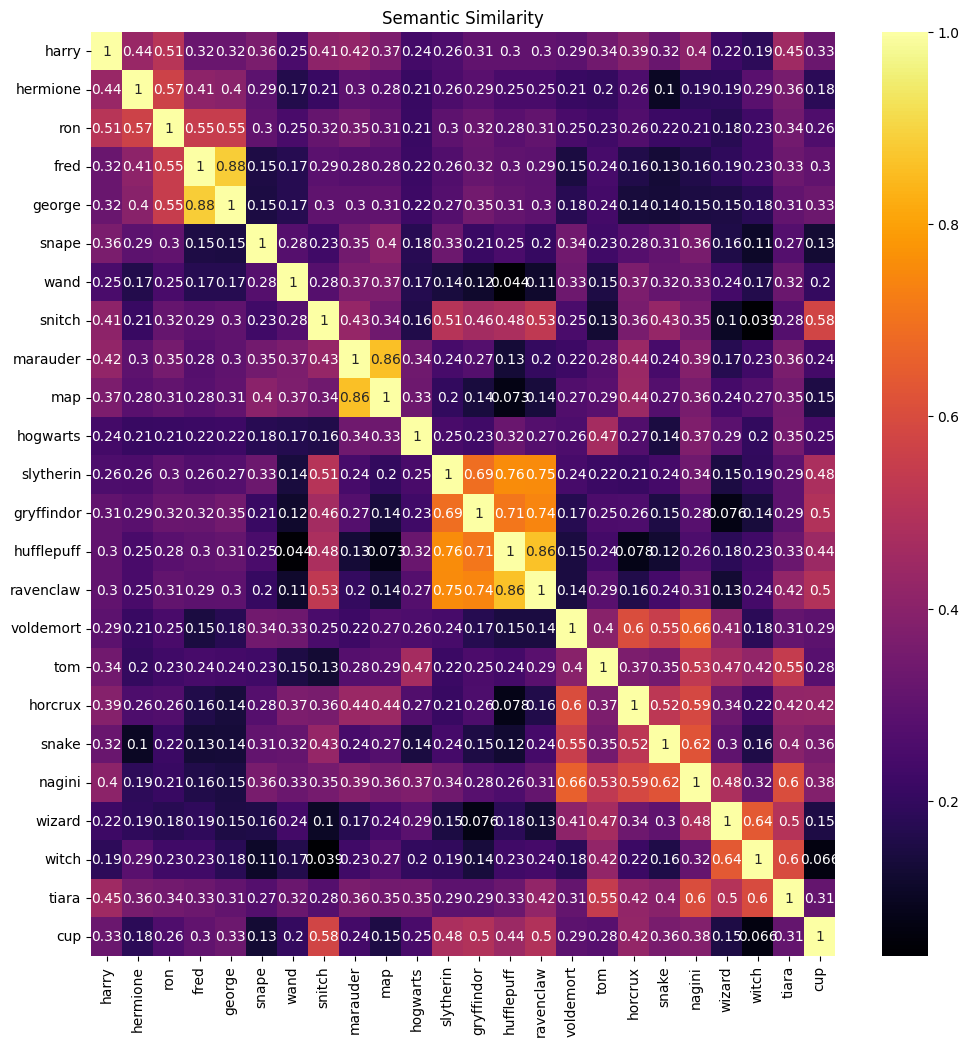

In [10]:
def plot_similarities(words):
    features = [np.array(model.wv[word]) for word in words]

    similarities = np.zeros((len(features), len(features)))
    for index1, feature1 in enumerate(features):
        for index2, feature2 in enumerate(features):
            similarities[index1, index2] = 1 - spatial.distance.cosine(feature1, feature2)

    fig, ax = plt.subplots(figsize=(12, 12))
    g = sns.heatmap(
        similarities,
        annot=True,
        xticklabels=words,
        yticklabels=words,
        cmap="inferno"
    )
    g.set_xticklabels(words, rotation=90)
    g.set_yticklabels(words, rotation=0)
    g.set_title("Semantic Similarity")

words = [
    "harry",
    "hermione",
    "ron",
    "fred",
    "george",
    "snape",
    "wand",
    "snitch",
    "marauder",
    "map",
    "hogwarts",
    "slytherin",
    "gryffindor",
    "hufflepuff",
    "ravenclaw",
    "voldemort",
    "tom",
    "horcrux",
    "snake",
    "nagini",
    "wizard",
    "witch",
    'tiara',
    'cup'
]
plot_similarities(words)

# Thank you!

Now lets do this with Shahname


In [28]:
from gensim.test.utils import datapath
from gensim import utils

class MyCorpus:
    """An iterator that yields sentences (lists of str)."""

    def __init__(self):
        self.lines = []

        files = os.listdir(".")
        files = [file for file in files if file.endswith("shahnameh.txt")]
        print(f"Found {len(files)} files")

        for file in files:
            for line in open(file):
                self.lines += [line]
        print(f"Got {len(self.lines)} lines.")

    def __iter__(self):
        for line in self.lines:
            preprocessed_line = utils.simple_preprocess(line)
            yield preprocessed_line

In [29]:
import gensim.models

sentences = MyCorpus()

model = gensim.models.Word2Vec(
    sentences=sentences,
    sg=1,
    vector_size=300, #embeding size
    window=20,
    min_count=3,
    workers=multiprocessing.cpu_count()
)

print("Done.")

Found 0 files
Got 0 lines.


RuntimeError: you must first build vocabulary before training the model

In [15]:
model.wv.most_similar("rostam", topn=20)

[('zavareh', 0.6841686964035034),
 ('zal', 0.6683619022369385),
 ('rakhsh', 0.6466792225837708),
 ('faramarz', 0.6313396692276001),
 ('olad', 0.620476484298706),
 ('bahman', 0.6064351797103882),
 ('hero', 0.5991017818450928),
 ('sohrab', 0.5924183130264282),
 ('zabolestan', 0.5916725397109985),
 ('bizhan', 0.5856828093528748),
 ('gorgin', 0.5825538635253906),
 ('zabol', 0.5821610689163208),
 ('esfandyar', 0.5787287950515747),
 ('advises', 0.5755040049552917),
 ('nushazar', 0.5750818848609924),
 ('zavol', 0.5723319053649902),
 ('akvan', 0.5686012506484985),
 ('dastan', 0.5566703677177429),
 ('roham', 0.5499092936515808),
 ('sam', 0.5465262532234192)]

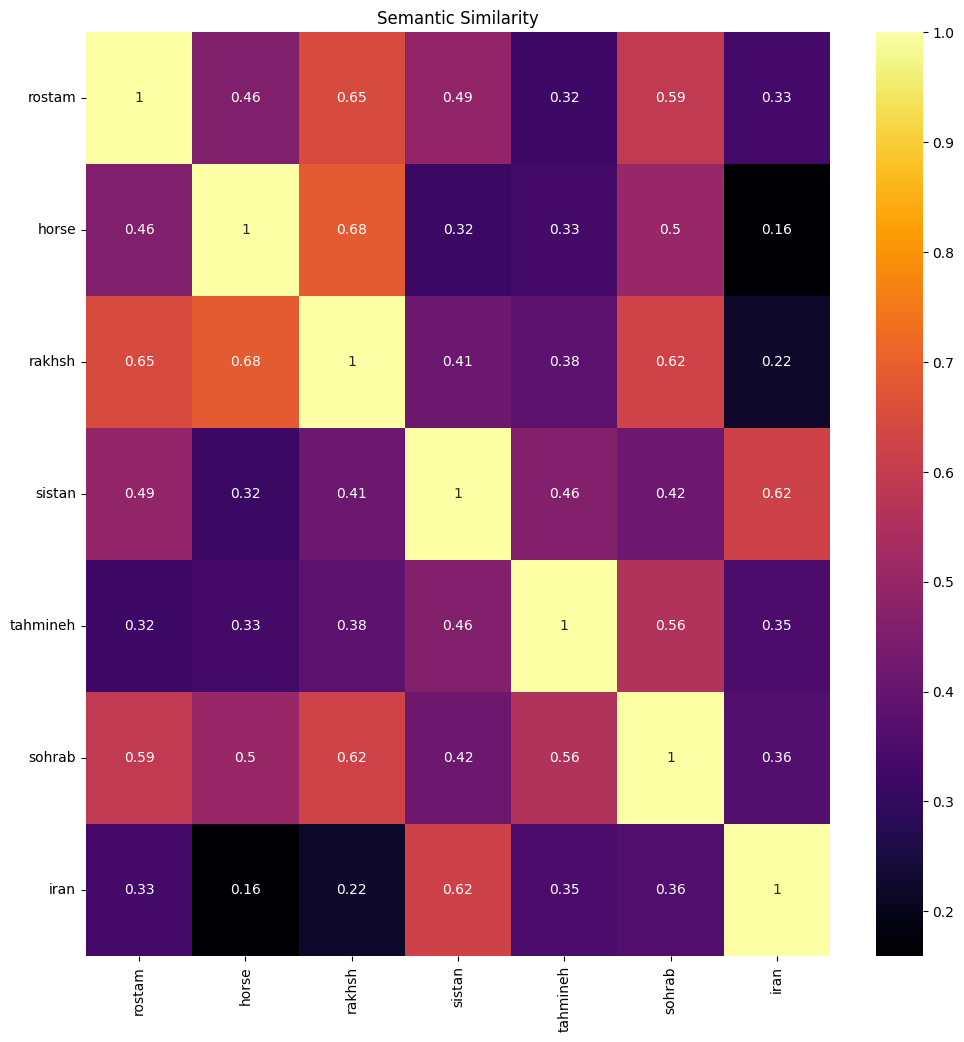

In [31]:
def plot_similarities(words):
    features = [np.array(model.wv[word]) for word in words]

    similarities = np.zeros((len(features), len(features)))
    for index1, feature1 in enumerate(features):
        for index2, feature2 in enumerate(features):
            similarities[index1, index2] = 1 - spatial.distance.cosine(feature1, feature2)

    fig, ax = plt.subplots(figsize=(12, 12))
    g = sns.heatmap(
        similarities,
        annot=True,
        xticklabels=words,
        yticklabels=words,
        cmap="inferno"
    )
    g.set_xticklabels(words, rotation=90)
    g.set_yticklabels(words, rotation=0)
    g.set_title("Semantic Similarity")

words = [
    "rostam",
    "horse",
    "soodabeh"

    "rakhsh",
    "sistan",

    "tahmineh",
    "sohrab",
    'iran'



]
plot_similarities(words)

# Freidns TV Show

In [6]:
!pip install kagglehub

In [9]:
import os
import kagglehub
import shutil

# Define the folder where the dataset will be stored
output_folder = "/content/friends_scripts"

# Ensure the directory exists
os.makedirs(output_folder, exist_ok=True)

# Download the dataset
path = kagglehub.dataset_download("divyansh22/friends-tv-show-script")

print("✅ Dataset downloaded and saved in:", path)

# Copy all files from the source path to the destination
shutil.copytree(path, output_folder, dirs_exist_ok=True)


✅ Dataset downloaded and saved in: /root/.cache/kagglehub/datasets/divyansh22/friends-tv-show-script/versions/1


'/content/friends_scripts'

In [36]:
from gensim.test.utils import datapath
from gensim import utils

class MyCorpus:
    """An iterator that yields sentences (lists of str)."""

    def __init__(self):
        self.lines = []
        folder = "./friends_scripts/"
        files = os.listdir("./friends_scripts")
        files = [file for file in files if file.endswith(".txt")]
        print(f"Found {len(files)} {files} files")

        for file in files:
            for line in open(folder + file):
                self.lines += [line]
        print(f"Got {len(self.lines)} lines.")

    def __iter__(self):
        for line in self.lines:
            preprocessed_line = utils.simple_preprocess(line)
            yield preprocessed_line

In [50]:
import gensim.models

sentences = MyCorpus()

model = gensim.models.Word2Vec(
    sentences=sentences,
    sg=1,
    vector_size=500, #embeding size
    window=50,
    min_count=3,
    workers=multiprocessing.cpu_count(),
    epochs=10
)

print("Done.")

Found 2 ['Friends_Transcript.txt', 'Crazy_For_Friends_-_Season_10_Scripts.txt'] files
Got 66566 lines.
Done.


In [52]:
model.wv.most_similar("chandler", topn=20)

[('firemen', 0.4935693144798279),
 ('lapsed', 0.49035874009132385),
 ('lenny', 0.4901324212551117),
 ('nooooooooo', 0.4899289309978485),
 ('ling', 0.4887096583843231),
 ('straining', 0.48440074920654297),
 ('joey', 0.484138548374176),
 ('guestroom', 0.48391038179397583),
 ('dokey', 0.4819144010543823),
 ('wink', 0.480696439743042),
 ('vividly', 0.4806152284145355),
 ('skeptical', 0.4790010452270508),
 ('hamper', 0.47818371653556824),
 ('awwww', 0.4775402843952179),
 ('dicing', 0.4767243266105652),
 ('goatee', 0.4750777781009674),
 ('joker', 0.474317729473114),
 ('souvenir', 0.4732236862182617),
 ('impatiently', 0.4731425940990448),
 ('stubing', 0.4709731340408325)]

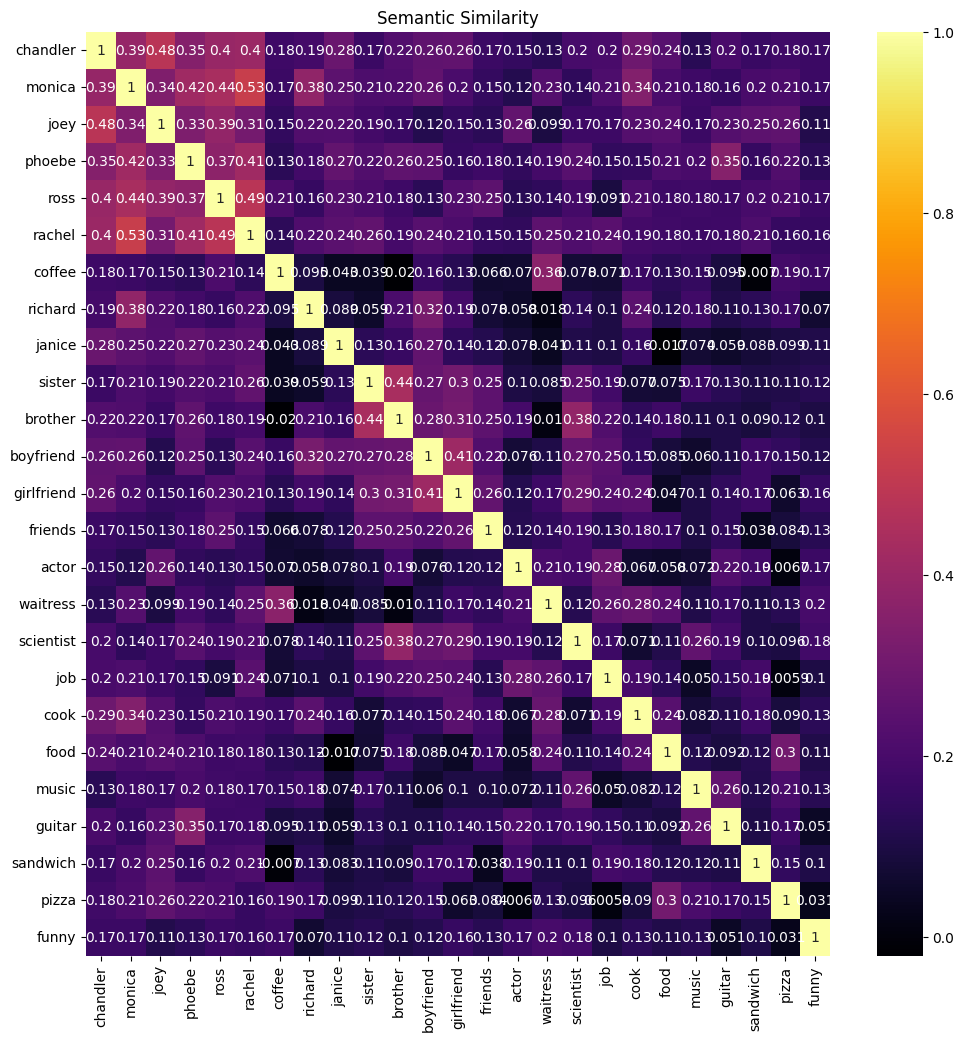

In [53]:
def plot_similarities(words):
    features = [np.array(model.wv[word]) for word in words]

    similarities = np.zeros((len(features), len(features)))
    for index1, feature1 in enumerate(features):
        for index2, feature2 in enumerate(features):
            similarities[index1, index2] = 1 - spatial.distance.cosine(feature1, feature2)

    fig, ax = plt.subplots(figsize=(12, 12))
    g = sns.heatmap(
        similarities,
        annot=True,
        xticklabels=words,
        yticklabels=words,
        cmap="inferno"
    )
    g.set_xticklabels(words, rotation=90)
    g.set_yticklabels(words, rotation=0)
    g.set_title("Semantic Similarity")

words = [
    "chandler",
    "monica",
    "joey",
    "phoebe",
    "ross",
    "rachel",
    "coffee",
    "richard",
    "janice",
    "sister",
    "brother",


    "boyfriend",
    "girlfriend",
    'friends',
    "actor",
    "waitress",
    "scientist",
    "job",
    "cook",
    "food",
    "music",
    "guitar",
    "sandwich",
    "pizza",
    "funny"




]
plot_similarities(words)